In [27]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.merge import merge

In [2]:
clpx01 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-0-1.tif')
clpx02 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-0-2.tif')
clpx03 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-0-3.tif')
clpx11 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-1-1.tif')
clpx12 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-1-2.tif')
clpx13 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-1-3.tif')
clpx20 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-2-0.tif')
clpx21 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-2-1.tif')
clpx22 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-2-2.tif')
clpx30 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-3-0.tif')
clpx31 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-3-1.tif')
clpx32 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-3-2.tif')
clpx40 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-4-0.tif')
clpx41 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-4-1.tif')
clpx42 = rasterio.open('/home/cparr/Downloads/June5_2017_CLPXortho-4-2.tif')

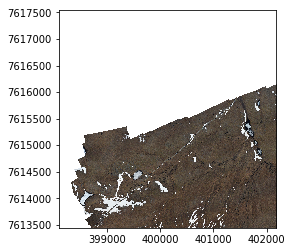

In [5]:
show(clpx01)

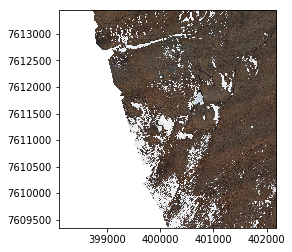

In [8]:
show(clpx02)

In [3]:
srcs = [clpx01, clpx02, clpx03,
       clpx11, clpx12, clpx13,
       clpx20, clpx21, clpx22,
        clpx30, clpx31, clpx32,
        clpx40, clpx41, clpx42]

arr, out_trans = merge(srcs, res=1)

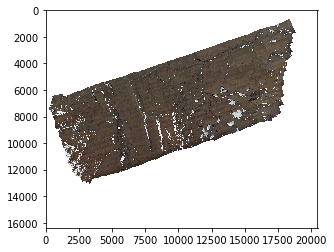

In [4]:
show(arr)

In [5]:
out_trans

Affine(1.0, 0.0, 398083.0,
       0.0, -1.0, 7621635.0)

In [21]:
arr.shape

(4, 16384, 20480)

In [22]:
out_meta = clpx22.meta.copy()
out_meta

{'count': 4,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 16384,
 'nodata': None,
 'transform': Affine(0.25, 0.0, 406275.0,
       0.0, -0.25, 7613443.0),
 'width': 16384}

In [23]:
out_meta.update({"height": arr.shape[1],
                 "width": arr.shape[2],
                 "transform": out_trans})
out_meta

{'count': 4,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 16384,
 'nodata': None,
 'transform': Affine(1.0, 0.0, 398083.0,
       0.0, -1.0, 7621635.0),
 'width': 20480}

In [24]:
with rasterio.open("/home/cparr/surfaces/orthos/clpx/clpx_june5_2017_ortho.tif", "w", **out_meta) as dest:
    dest.write(arr)

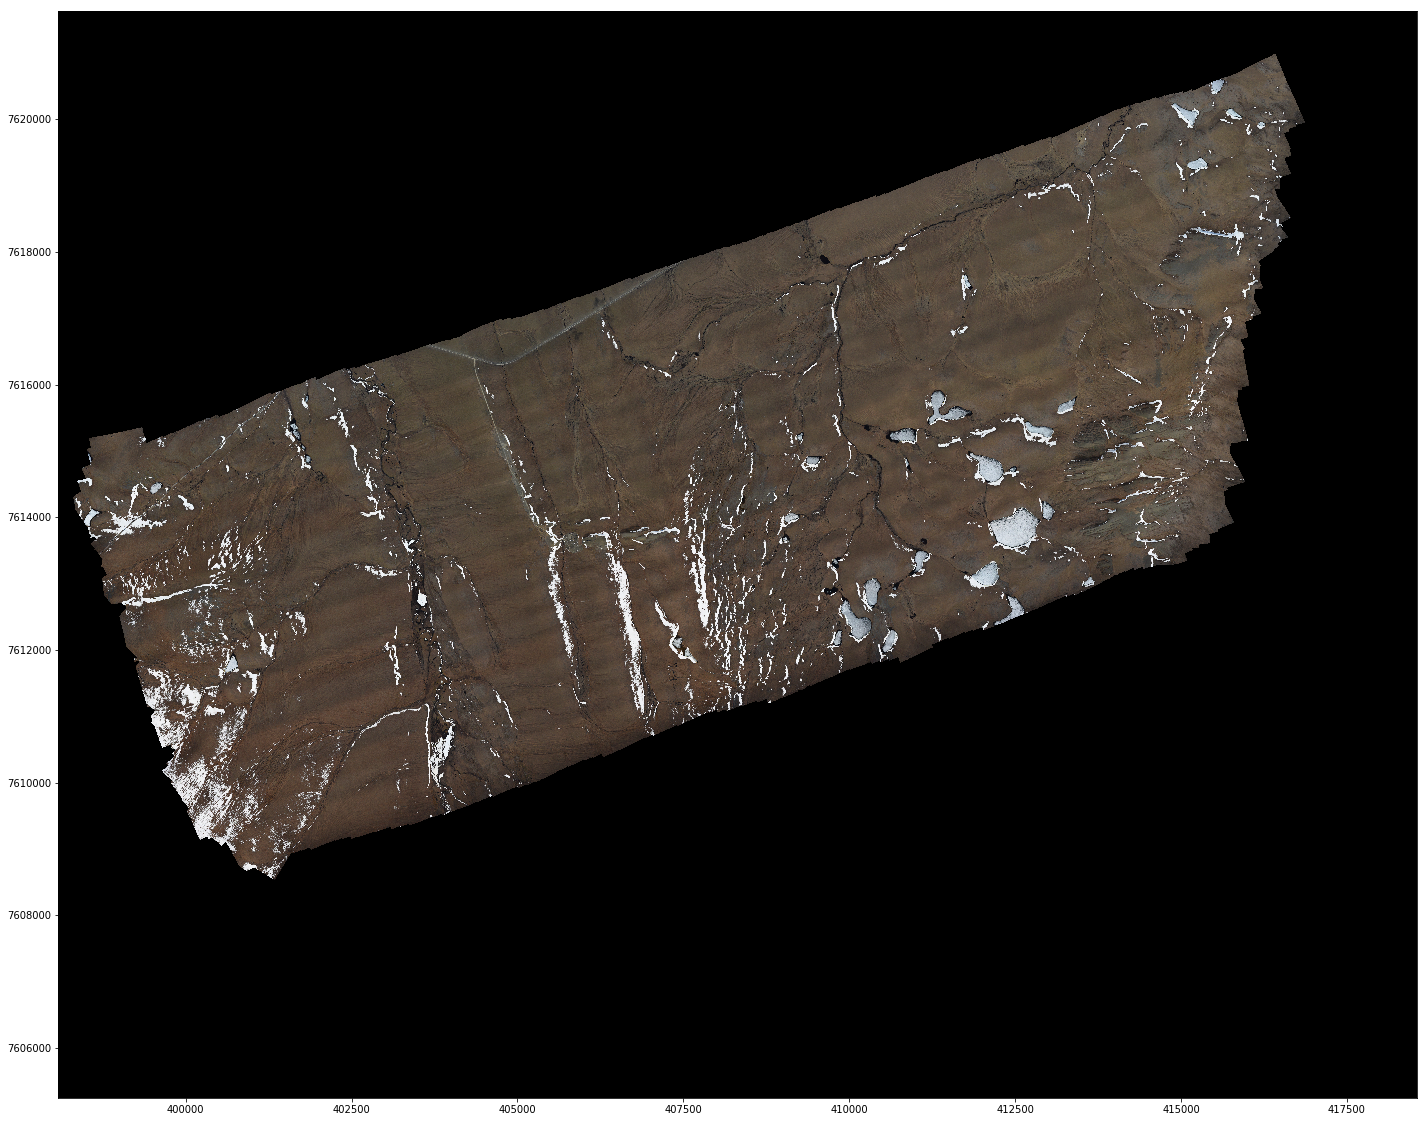

In [34]:
#del arr
src = rasterio.open("/home/cparr/surfaces/orthos/clpx/clpx_june5_2017_ortho.tif")
plt.figure(figsize=(32,20))
show(src)